# INTRODUCTION

The goal of this project is to examine maternal mortality rates from the years 1999 to 2019 in women across five race and ethnicity groups within The United States, with a focus on Texas, to investigate the hypothesis that women of color, perhaps particularly black women, are more susceptible to maternal mortality.  Such hypotheses have become fairly researched in the past decade as more women complain about having serious medical concerns dismissed by health professionals (Washington, 2023).

I chose this hypothesis after researching other studies that argue for the existence of biases against black women's health concerns in hospitals, especially those within predominantly republican states such as Texas (Hassanein, 2024). Past medical studies have viewed women of color as test subjects and practiced medical procedures on women of color with no sedatives or analgesics (Brown, 2017). It is important to ensure that a previously harmed demographic is receiving equal and fair access to healthcare, and that is why it is important to track the mortality rate and efficacy of healthcare procedures performed on women. Additionally, as a woman of color, I and many women I have spoken with share the experience of feeling unheard and disregarded by medical professionals, so this hypothesis is very central to mine and my community's wellbeing.

The dataset used in this experiment can be found on the Global Health Data Exchange (GHDx) Organization's web page. The dataset is originally provided by the Institute for Health Metrics and Evaluation (IHME). This is a direct link to the webpage: https://ghdx.healthdata.org/record/ihme-data/united-states-maternal-mortality-by-state-race-ethnicity-1999-2019 .
 Unused columns such as identification numbers for location and sex have been removed for clarity.

# DATA ORGANIZATION AND PROCESSING


# Load the Dataframe

In [ ]:
## LOAD THE DATAFRAME ##

# imports #
import numpy as np
from google.colab import files
import pandas as pd

# the files module from Google Colab allows us to upload data files to our notebook
uploaded = files.upload()

# read csv file and save it as a new dataframe variable
dataframe = pd.read_csv('MMM.CSV') # represents enterity of maternal mortality data

Saving MMM.CSV to MMM.CSV


# Organize the Dataframe

In [ ]:
## ORGANIZE ##

# this gives the number of rows and columns in data file
rc = dataframe.shape
print(rc) # for visualization

print(dataframe.columns) # returns all of the original column names

# drop unused columns of data given their name, and assigning
# axis=1 to designate that it is a column
dataframe = dataframe.drop('location_id', axis = 1)
dataframe = dataframe.drop('measure_id', axis = 1)
dataframe = dataframe.drop('sex_id', axis = 1)
dataframe = dataframe.drop('age_group_id', axis = 1)
dataframe = dataframe.drop('metric_id', axis = 1)
dataframe = dataframe.drop('sex_name', axis = 1)
dataframe = dataframe.drop('metric_name', axis = 1)

# rename columns with long namess for simplicity
dataframe = dataframe.rename(columns={'location_name': 'location', 'age_group_name': 'age_group', 'year_id': 'year'})
print(dataframe.columns)

(5901, 15)
Index(['measure_id', 'measure_name', 'location_id', 'location_name',
       'race_group', 'sex_id', 'sex_name', 'age_group_id', 'age_group_name',
       'year_id', 'metric_id', 'metric_name', 'val', 'lower', 'upper'],
      dtype='object')
Index(['measure_name', 'location', 'race_group', 'age_group', 'year', 'val',
       'lower', 'upper'],
      dtype='object')


# Columns Explained

measure_id: is always equal to 'maternal mortality ratio', ensures we are only using data rows where maternal mortality is measured

location: the state within the US

race_group: race of the group measured, always either 'Hispanic and any race', 'American Indian and Alaskan Native', 'Native Hawaiian and Pacific Islander', 'Black', or 'White'

year: ranges from 1999 to 2019

val: the reported maternal mortality ratio

lower/ upper: range of variability for the ratio

#Plot the Data

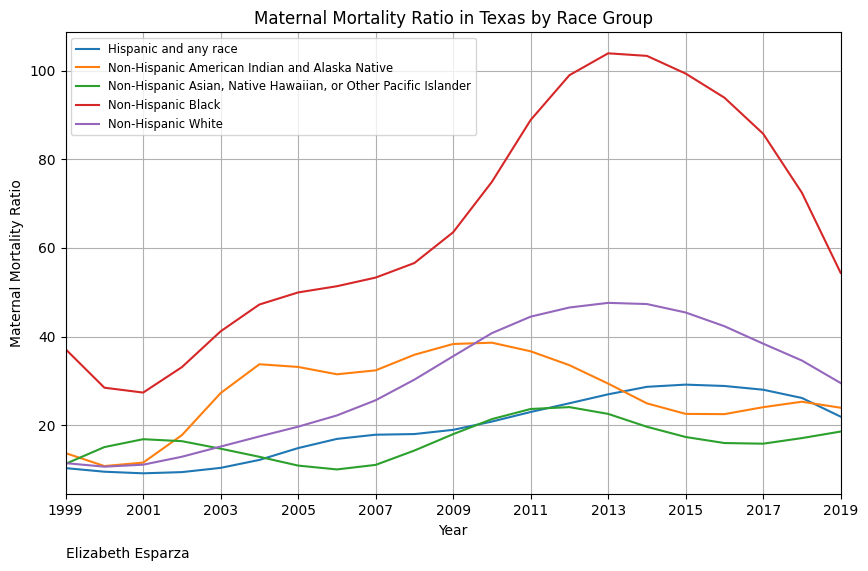

In [ ]:
## PLOT RATIOS FOR TEXAS ONLY ##

# Imports
import matplotlib.pyplot as plt
import numpy as np

# Store data for only Texas
texas_data = dataframe[dataframe['location'] == 'Texas']

# Group Texas data by race group and year, then calculate the mean of maternal mortality ratios
# while adjusting the new dataframe's indices rather than keeping original subsetted indices (ex: 0,1,2 instead of 2,6,10)
grouped_data = texas_data.groupby(['race_group', 'year'])['val'].mean().reset_index()

plt.figure(figsize=(10, 6)) # initialize plot

# Loop through each race group, adding rows to race_group_data only when the
# race_group of a row matches the currently selected race, then add the data to the plot
for race_group in grouped_data['race_group'].unique():
    race_group_data = grouped_data[grouped_data['race_group'] == race_group]

    # Create an array of years from 1999 to 2019
    years = np.arange(1999, 2020)

    # Subset that includes ratios only for the given year range
    ratios = race_group_data[race_group_data['year'].isin(years)]['val']
    plt.plot(years, ratios, label=race_group)

# Title graph and label axes
plt.title('Maternal Mortality Ratio in Texas by Race Group')
plt.xlabel('Year')
plt.ylabel('Maternal Mortality Ratio')

# Add a legend, grid, and name
plt.legend(fontsize = 'small') # small fontsize avoids overlap with lines
plt.grid(True)
plt.text(1999,-10, 'Elizabeth Esparza')

# Arrange x axes to go from 1999 to 2019 in steps of 2 years
plt.xticks(np.arange(1999, 2020, step=2))
plt.xlim(1999, 2019)
plt.show()

# FIGURE 1
The above figure plots the maternal mortality ratio for each race group in Texas from the year 1999 up to 2019 on a line graph. Race group is designated by color, as shown on the legend. It can be seen that non hispanic black women have a mortality rate much higher than any other race at every year.

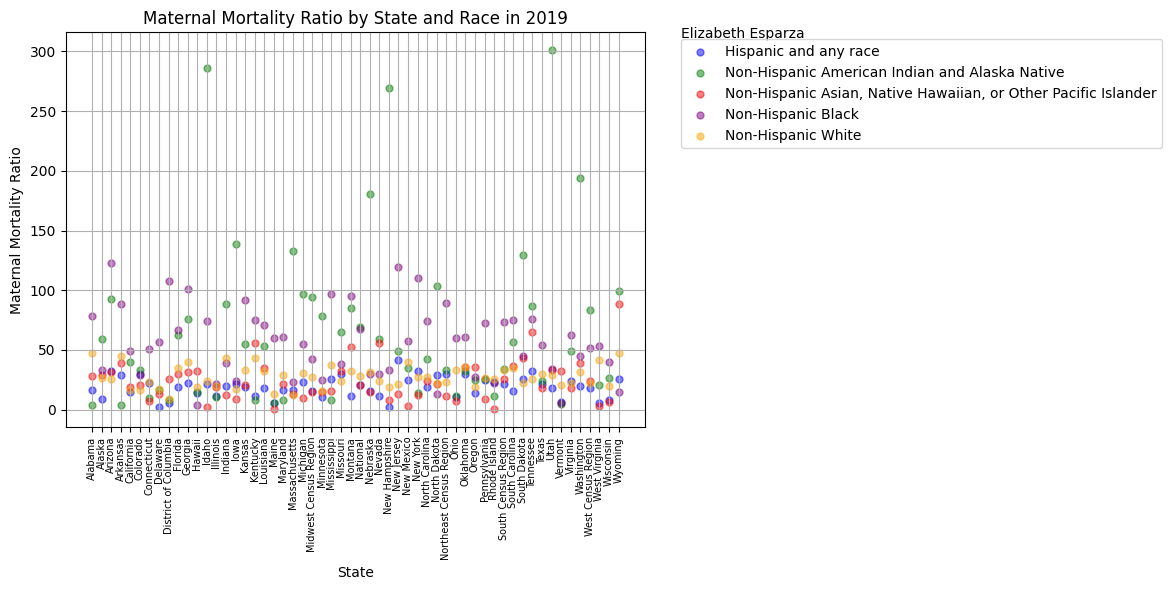

In [ ]:
## MATERNAL MORTALITY RATIO BY RACE GROUP FOR EACH STATE IN 2019 ##

# Filter dataframe to get data for the year 2019 only
data_2019 = dataframe[dataframe['year'] == 2019]

# initialize figure
plt.figure(figsize=(12, 6))

# Set colors markers by race group for plotting
race_colors = {'Hispanic and any race': 'blue', 'Non-Hispanic American Indian and Alaska Native': 'green',
               'Non-Hispanic Asian, Native Hawaiian, or Other Pacific Islander': 'red', 'Non-Hispanic Black': 'purple',
               'Non-Hispanic White': 'orange'}

# Create a scatter plot for each race group, separating points by race group and its respective color
for race_group, color in race_colors.items():
    race_data = data_2019[data_2019['race_group'] == race_group]
    plt.scatter(race_data['location'], race_data['val'], label=race_group, color=color, s=25, alpha=0.5) # s is size of points, alpha is sheerness

# Title graph and label axes
plt.title('Maternal Mortality Ratio by State and Race in 2019')
plt.xlabel('State')
plt.ylabel('Maternal Mortality Ratio')

# Add a legend, grid, and name
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot
plt.grid(True)
plt.text(61.5,311, 'Elizabeth Esparza')

plt.xticks(rotation=90, fontsize=7)  # Rotate x axis labels and make text smaller
plt.tight_layout()  # Adjust layout to prevent overlapping in x axis
plt.show()

#FIGURE 2
The figure above shows maternal mortality ratio of each race group plotted by state on a scatterplot for only 2019. Additional census region information is also plotted. Each race group is plotted by color as shown on the legend. Most notably,  Native women are seen to die at a much higher rate throughout many states, with Black women following close behind.

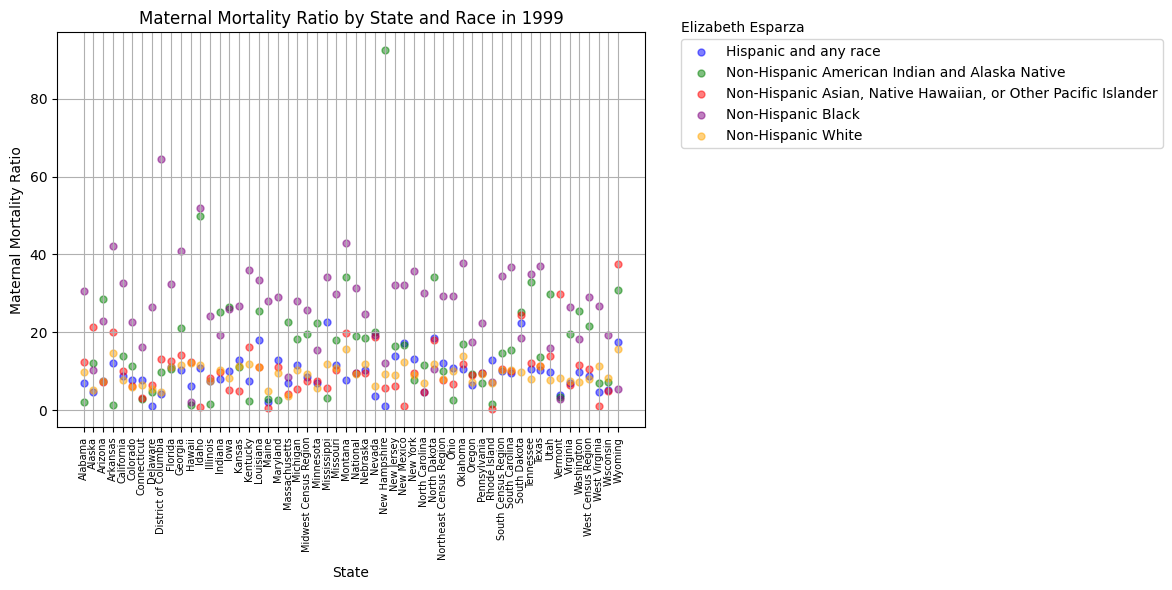

In [ ]:
## MATERNAL MORTALITY RATIO BY RACE GROUP FOR EACH STATE IN 1999 ##

# Filter dataframe to get data for the year 1999 only
data_1999 = dataframe[dataframe['year'] == 1999]

# initialize figure
plt.figure(figsize=(12, 6))

# Set colors markers by race group for plotting
race_colors = {'Hispanic and any race': 'blue', 'Non-Hispanic American Indian and Alaska Native': 'green',
               'Non-Hispanic Asian, Native Hawaiian, or Other Pacific Islander': 'red', 'Non-Hispanic Black': 'purple',
               'Non-Hispanic White': 'orange'}

# Create a scatter plot for each race group, separating points by race group and its respective color
for race_group, color in race_colors.items():
    race_data = data_1999[data_1999['race_group'] == race_group]
    plt.scatter(race_data['location'], race_data['val'], label=race_group, color=color, s=25, alpha=0.5) # s is size of points, alpha is sheerness

# Title graph and label axes
plt.title('Maternal Mortality Ratio by State and Race in 1999')
plt.xlabel('State')
plt.ylabel('Maternal Mortality Ratio')

# Add a legend, grid, and name
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot
plt.grid(True)
plt.text(61.5,97, 'Elizabeth Esparza')

plt.xticks(rotation=90, fontsize=7)  # Rotate x axis labels and make text smaller
plt.tight_layout()  # Adjust layout to prevent overlapping in x axis
plt.show()

#FIGURE 3
The figure above shows maternal mortality ratio of each race group plotted by state on a scatterplot for only 1999. Additional census region information is also plotted. Each race group is plotted by color as shown on the legend. Most notably,  Black and Native women are still seen to die at an overwhelmingly larger rate than women in other race groups

Average Maternal Mortality Ratios for 2019:

       Black women: 56.78518506348214
       Native American/Alaskan women: 66.20875913085715
       Asian/Pacific Islander women : 24.025538258303566
       Hispanic women : 19.053782276785714
       White women : 27.53392094975



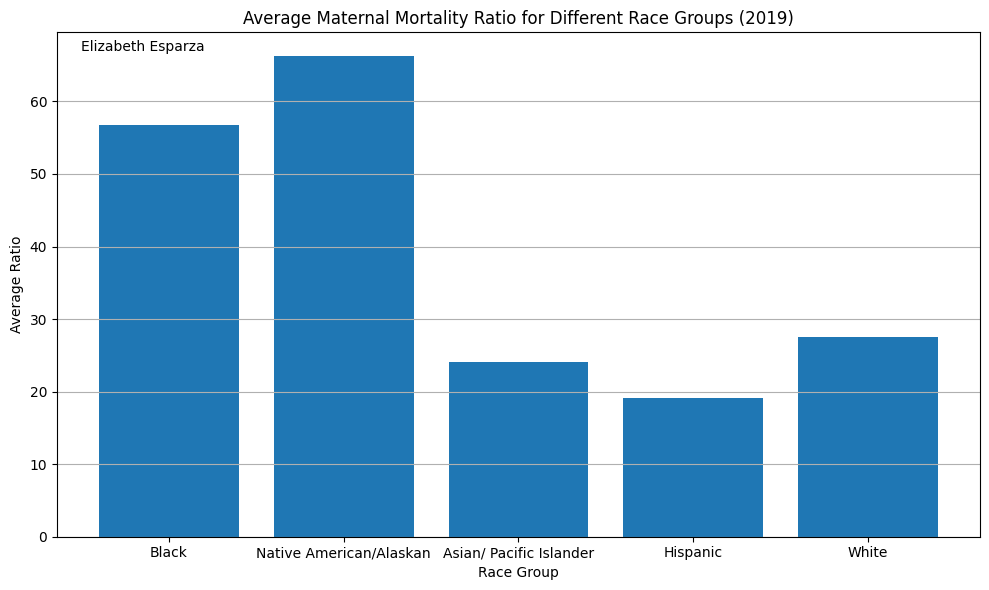

In [ ]:
## CALCULATE AND PLOT AVERAGE MATERNAL MORTALITY RATIOS BY RACE FOR 2019 ##

# Filter the dataframe to include data for the year 2019
data_2019 = dataframe[dataframe['year'] == 2019]

# Group the data by location and race group, then calculate the mean of maternal mortality ratios
grouped_data = data_2019.groupby(['location', 'race_group'])['val'].mean().reset_index()

# Separate the data for Black, Native American/Alaskan, Asian/ Pacific Islander, Hispanic, and White women
black_data = grouped_data[grouped_data['race_group'] == 'Non-Hispanic Black']
native_data = grouped_data[grouped_data['race_group'] == 'Non-Hispanic American Indian and Alaska Native']
asian_data = grouped_data[grouped_data['race_group'] == 'Non-Hispanic Asian, Native Hawaiian, or Other Pacific Islander']
white_data = grouped_data[grouped_data['race_group'] == 'Non-Hispanic White']
hispanic_data = grouped_data[grouped_data['race_group'] == 'Hispanic and any race']

# Calculate the average ratios for each race group
black_women = black_data['val'].mean()
native_women = native_data['val'].mean()
asian_women = asian_data['val'].mean()
hispanic_women = hispanic_data['val'].mean()
white_women = white_data['val'].mean()

# Print the results
print('Average Maternal Mortality Ratios for 2019:')
print()
print(f"       Black women: {black_women}")
print(f"       Native American/Alaskan women: {native_women}")
print(f"       Asian/Pacific Islander women : {asian_women}")
print(f"       Hispanic women : {hispanic_women}")
print(f"       White women : {white_women}")
print()

# Plot the averages
race_groups = ['Black', 'Native American/Alaskan', 'Asian/ Pacific Islander', 'Hispanic', 'White'] # creates list of the race_groups
ratios = [black_women, native_women, asian_women, hispanic_women, white_women] # creates a list of the average ratios per race

plt.figure(figsize=(10, 6))

# Create a bar graph with each average ratio for each race group
plt.bar(race_groups, ratios)
plt.title('Average Maternal Mortality Ratio for Different Race Groups (2019)')
plt.xlabel('Race Group')
plt.ylabel('Average Ratio')
plt.grid(axis='y')
plt.tight_layout()
plt.text(-.5, 67, 'Elizabeth Esparza')
plt.show()

#FIGURE 4
The bar plot shows the average maternal mortality ratio for each race group for the year 2019 only.

Average Maternal Mortality Ratios for 2019:

       Black women: 44.160353454733
       Native American/Alaskan women: 33.77048496360119
       Asian/Pacific Islander women : 16.76901683735119
       Hispanic women : 14.815087033511904
       White women : 19.93396997989626



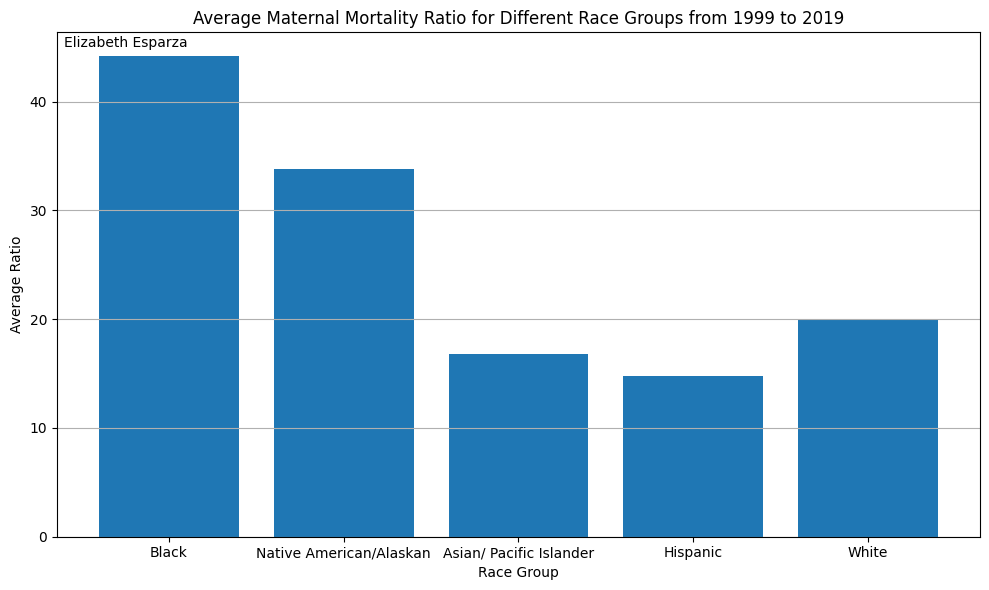

In [ ]:
## CALCULATE AND PLOT AVERAGE MATERNAL MORTALITY RATIOS BY RACE FOR ALL YEARS ##


# Group the data by location and race group, then calculate the mean of maternal mortality ratios
grouped_data_allyears = dataframe.groupby(['location', 'race_group'])['val'].mean().reset_index()

# Separate the data for Black, Native American/Alaskan, Asian/ Pacific Islander, Hispanic, and White women
black_data = grouped_data_allyears[grouped_data['race_group'] == 'Non-Hispanic Black']
native_data = grouped_data_allyears[grouped_data['race_group'] == 'Non-Hispanic American Indian and Alaska Native']
asian_data = grouped_data_allyears[grouped_data['race_group'] == 'Non-Hispanic Asian, Native Hawaiian, or Other Pacific Islander']
white_data = grouped_data_allyears[grouped_data['race_group'] == 'Non-Hispanic White']
hispanic_data = grouped_data_allyears[grouped_data['race_group'] == 'Hispanic and any race']

# Calculate the average ratios for each race group
black_women = black_data['val'].mean()
native_women = native_data['val'].mean()
asian_women = asian_data['val'].mean()
hispanic_women = hispanic_data['val'].mean()
white_women = white_data['val'].mean()

# Print the results
print('Average Maternal Mortality Ratios for 2019:')
print()
print(f"       Black women: {black_women}")
print(f"       Native American/Alaskan women: {native_women}")
print(f"       Asian/Pacific Islander women : {asian_women}")
print(f"       Hispanic women : {hispanic_women}")
print(f"       White women : {white_women}")
print()

# Plot the averages
race_groups = ['Black', 'Native American/Alaskan', 'Asian/ Pacific Islander', 'Hispanic', 'White'] # creates list of the race_groups
ratios = [black_women, native_women, asian_women, hispanic_women, white_women] # creates a list of the average ratios per race

plt.figure(figsize=(10, 6))

# Create a bar graph with each average ratio for each race group
plt.bar(race_groups, ratios)
plt.title('Average Maternal Mortality Ratio for Different Race Groups from 1999 to 2019')
plt.xlabel('Race Group')
plt.ylabel('Average Ratio')
plt.grid(axis='y')
plt.tight_layout()
plt.text(-.6, 45, 'Elizabeth Esparza')
plt.show()

#FIGURE 5
The bar plot above shows the average maternal mortality ratio for each race group, with ratios from every state and year averaged for each race.

In [ ]:
## ANALYSIS OF VARIANCE (ANOVA) FOR ALL RACE GROUPS ##

# imports
from scipy.stats import f_oneway

# Filter the dataframe to include only race_group and val
data_race = dataframe[['race_group', 'val']]

# Create a dictionary to store maternal mortality ratios for each race group
race_groups = {}

# Add maternal mortality ratios for each race group to race_groups dictionary
for race_group in data_race['race_group'].unique():
    race_groups[race_group] = data_race[data_race['race_group'] == race_group]['val']

# Perform ANOVA test
anova_result = f_oneway(*race_groups.values())

# ANOVA test result
print("ANOVA Test Result:")
print()

# F stat tells us the difference between the means of the ratios for each race group
print("F-statistic:", anova_result.statistic)

# The p val is the probability of obtaining these results if the means are actually similar
print("p-value:", anova_result.pvalue)

ANOVA Test Result:

F-statistic: 305.3389383879256
p-value: 1.7568446620915704e-291


In [ ]:
## T TEST BETWEEN AVERAGE RATIO FOR BLACK WOMEN VS NONBLACK WOMEN ##

# Imports
from scipy.stats import ttest_ind
from scipy.stats import t

# Filter dataframe to include only maternal mortality ratios for black women
black_women_ratios = dataframe[dataframe['race_group'] == 'Non-Hispanic Black']['val']

# Filter the DataFrame to include maternal mortality ratios for every non-black race
non_black_women_ratios = dataframe[dataframe['race_group'] != 'Non-Hispanic Black']['val']

# Significance level (alpha)
alpha = 0.05
# Find degrees of freedom for two sample t tests (= n1+n2-2)
n1 = len(black_women_ratios)
n2 = len(non_black_women_ratios)
df = n1 + n2 - 2

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(black_women_ratios, non_black_women_ratios)

# Critical value
critical_value = t.ppf(1 - alpha/2, df)

# T-test results
print("T-Test Results (Black vs Non Black Women):")
print()

# Measures the difference between the means of the groups
print("t-statistic:", t_statistic)
print("critical value:", critical_value)

# The p val is the probability of obtaining these results if the means are actually similar
print("p-value:", p_value)

T-Test Results (Black vs Non Black Women):

t-statistic: 30.298554396860094
critical value: 1.9603662136932063
p-value: 1.508147370644998e-187


In [ ]:
## T TEST BETWEEN AVERAGE RATIO FOR NATIVE WOMEN VS NONNATIVE WOMEN ##

# Imports
from scipy.stats import ttest_ind

# Filter dataframe to include only maternal mortality ratios for native women
native_women_ratios = dataframe[dataframe['race_group'] == 'Non-Hispanic American Indian and Alaska Native']['val']

# Filter the dataframe to include maternal mortality ratios for every non native race
non_native_women_ratios = dataframe[dataframe['race_group'] != 'Non-Hispanic American Indian and Alaska Native']['val']

# Significance level (alpha)
alpha = 0.05
# Find degrees of freedom for two sample t tests (= n1+n2-2)
n1 = len(black_women_ratios)
n2 = len(non_black_women_ratios)
df = n1 + n2 - 2

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(native_women_ratios, non_native_women_ratios)

# Critical value
critical_value = t.ppf(1 - alpha/2, df)

# T-test results
print("T-Test Results (Native vs Non Native women):")
print()

# Measures the difference between the means of the groups
print("t-statistic:", t_statistic)
print("critical value:", critical_value)

# The p val is the probability of obtaining these results if the means are actually similar
print("p-value:", p_value)

T-Test Results (Native vs Non Native women):

t-statistic: 12.318148349767876
critical value: 1.9603662136932063
p-value: 1.9120124929222104e-34


#DISCUSSION

The goal of this project was to visualize the maternal mortality rates of women from five different general racial and ethnic groups in the United States. The central hypothesis explored was that women of color, particularly black women, were disproportionately affected by maternal mortality.

I tested this hypothesis by plotting the ratios for each race group in Texas during 2019, which resulted in a figure that agreed with this hypothesis. However, given that this was only a small piece of the overall data, I then plotted the ratios for every state and race for 2019. This showed that Native and Black women had much higher rates of maternal mortality than any other race. The same proved true when this was repeated for the year 1999.

When I averaged the ratios for each race group across the states for the year 2019 and plotted these averages, it was clear once again that Native American women had the highest average maternal mortality ratio that year at 66.209, closely followed by Black women at 56.785, then white women at 27.533. This was a significant jump. When I repeated this process for every year from 1999 to 2019 averaged together, the results showed that Black women had the overall highest maternal mortality ratio at 44.16, followed by Native Women at 33.77, then White women at 19.334. These results support the hypothesis that Black women are disproportionately affected by maternal mortality, but also that native women are at a higher risk as well rather than all women of color.

An analysis of variance test was then performed for all race groups. This yielded an F statistic of 305.339, meaning there was quite a significant difference between the ratio averages for each race group. The p value was 1.757e-291, and since this is much smaller than the threshold of 0.05 for a 95 % confidence interval, we can conclude that there is a very low probability of rejecting the null hypothesis that there is no significant difference between the means when it is actually true, meaning there is strong evidence that the average ratios are significantly different from one another.

Independent two sample T tests where also ran between the average maternal mortality ratios for black women and nonblack women. This yielded a test statistic of 30.299, which was much higher than the calculated critical level of 1.96. The p value was also very low at 1.508e-187, and because this is much smaller than the threshold of 0.05 for a 95 % confidence interval, we can again conclude that there is a high likelihood that the ratios for the two race groups are significantly different.This information all allows us to conclude that there is a significant difference betweeen the maternal mortality ratios of black and nonblack women. The same was done between native and nonnative women. This yielded a T statistic of 12.318 and a calculated critical value of 1.96. The calculated p value was 1.912e-34, which is once again lower than 0.05. Given that the T statistic is higher than the calculated critical value and the p value is much lower than 0.05, this supports the hypothesis that the maternal mortality ratio for native women is significantly different from the maternal mortality ratio of nonnative women.

Overall, it seems that it was too general to hypothesize that all women of color have a higher rate of materal mortality. White women often had lower low rates, but so did hispanic women and asian women. What is supported by these findings is that native and black women have had the highest rates of maternal mortality from the year 1999 up to 2019.

There are a couple possible limitations to this study. One being that the data for hispanic women included hispanic women of any race. This makes it difficult to know if some hispanic women were also black or native and therefore impossible to classify them correctly. Another limitation is that recent data from 2020 to 2024 is not included, which limits the applicability of these findings to our modern day. Additionally, this study focuses on race and ethnicity, assuming that racial bias plays a part in higher maternal mortality. It may be possible that confounding variables such as income and access to healthcare could impact these rates. A future study focusing on maternal mortality in relation to income would be a great addition to these findings and help explain why it is that native and black women are more affected.

# SOURCES
- Washington A, Randall J. "We're Not Taken Seriously": Describing the Experiences of Perceived Discrimination in Medical Settings for Black Women. J Racial Ethn Health Disparities. 2023 Apr;10(2):883-891. doi: 10.1007/s40615-022-01276-9. Epub 2022 Mar 3. PMID: 35239178; PMCID: PMC8893054.
- Hassanein, Nada. “To Close Racial Gap in Maternal Health, Some States Take Aim at Implicit Bias • Source New Mexico.” Source New Mexico, 16 Apr. 2024, sourcenm.com/2024/04/16/to-close-racial-gap-in-maternal-health-some-states-take-aim-at-implicit-bias/.
- Brown, DeNeen L. “A Surgeon Experimented on Slave Women without Anesthesia. Now His Statues Are under Attack. - The Washington Post.” The Wahington Post, 29 Aug. 2017, www.washingtonpost.com/news/retropolis/wp/2017/08/29/a-surgeon-experimented-on-slave-women-without-anesthesia-now-his-statues-are-under-attack/.